In [ ]:
# General (scientific) computing
import os
import time
import glob
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib.patches import Ellipse
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.cmap'] = 'Greys_r'

# Astronomical computing
import fitsio
from astropy.visualization import simple_norm, AsinhStretch
#import astroalign as aa
import sep
import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u

# Your Image Calibration and Photometry Code
from complete_process import average_bias, average_dark, average_flat, science_exposure
# Note that you do not need to have magnitude errors implemented. That is for lab 1.5! Returning 0 for all
# magnitude errors is fine for now.
from photometry import create_phot_cat, aper_flux, multi_ellipse_aper_flux

Fluxes

[696.5762276245115]
[10.952071835215511]


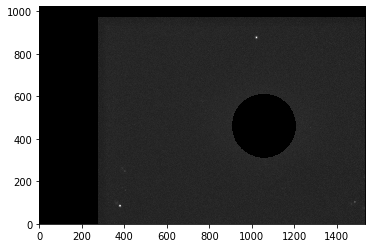

In [3]:
# M94 R Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_R.fit', header=True)
#print(header['EXPTIME'])
#print(3*60 + 6 * 15)# + 4 * 15)

rfl, rerrl, risl, rib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[150], b_list=[150], 
                                        h_list=[1055], k_list=[460],
                                       bgx=1055, bgy=460, background_width=400, angles=[0], gain=1,
                                                nimages1=9, nimages2=4, errFlag=True, 
                                                read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                                avg_dark_current1=0.07143249638710437, 
                                                avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)
plt.imshow(im * np.invert(risl[0]))
print(rfl)
print(rerrl)

[9.999880928818119]
[1.457038205576854]


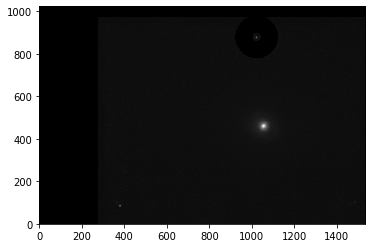

In [20]:
# BD+42 R Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_R.fit', header=True)
#print(header['EXPTIME'])
#print(3*60 + 6 * 15)# + 4 * 15)

rfl, rerrl, risl, rib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[20], b_list=[20], 
                                        h_list=[1021], k_list=[877],
                                       bgx=1021, bgy=877, background_width=100, angles=[0], gain=1,
                                                nimages1=9, nimages2=4, errFlag=True, 
                                                read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                                avg_dark_current1=0.07143249638710437, 
                                                avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)
plt.imshow(im * np.invert(rib))
print(rfl)
print(rerrl)

7500.0
[49.81641416136486]
[1.5823644272793405]


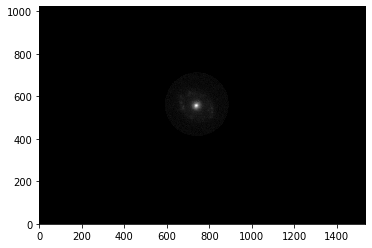

In [12]:
# M94 Ha Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_Ha.fit', header=True)
print(header['EXPTIME'])

hafl, haerrl, haisl, haib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[150], b_list=[150], 
                                        h_list=[740], k_list=[561],
                                       bgx=740, bgy=561, background_width=400, angles=[0], gain=1,
                                                nimages1=85, nimages2=40, errFlag=True, 
                                                read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                                avg_dark_current1=0.07143249638710437, 
                                                avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=40*60)
plt.imshow(im * (haisl[0]))
print(hafl)
print(haerrl)

7500.0
[0.6137139195780158]
[0.315819191674278]


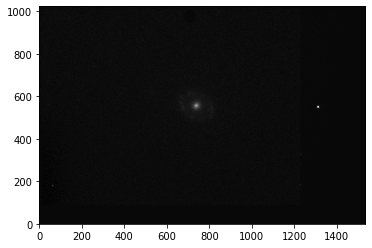

In [14]:
# BD+42 Ha Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_Ha.fit', header=True)
print(header['EXPTIME'])

hafl, haerrl, haisl, haib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[30], b_list=[30], 
                                        h_list=[706], k_list=[973],
                                       bgx=706, bgy=973, background_width=90, angles=[0], gain=1,
                                                nimages1=85, nimages2=40, errFlag=True, 
                                                read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                                avg_dark_current1=0.07143249638710437, 
                                                avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=40*60)
plt.imshow(im * np.invert(haisl[0]))
print(hafl)
print(haerrl)

Differential Photometry

Flux Subtraction

In [ ]:
fR = None
fRerr = None
fHa = None
fHaerr = None
DW = None

EHaf = fHa - (fR / DW)
EHaf_err = np.sqrt((fRerr ** 2) + (fHaerr ** 2) + ?????????)

Luminosity

In [ ]:
d = None
derr = None
f = None
ferr = None

L = 4 * np.pi * (d ** 2) * f
Lerr = 4 * np.pi * (ferr * (d ** 2) + derr * 2 * d * f)